# Teste Data Science Elo7

### Dataset

In summary, the dataset contains 38.507 entries comprising 5 categories ("Bebê", "Bijuterias e Jóias", "Decoração", "Lembrancinhas", "Papel e Cia", and "Outros"). Each entry corresponds to a viewed product based on a query term used in the search process.

In this dataset you will find the following columns:

 - product_id - product identification
 - seller_id - seller identification
 - query - query term inserted by the user
 - search_page - page number of the search results (min 1 and max 5)
 - position - position number of product in the search results (min 0 and max 38)
 - title - product title
 - concatenated_tags - product tags inserted by the seller (the tags are separated using a space character)
 - creation_date - creation date of product in the Elo7 platform
 - price - product price (in BRL)
 - weight - weight of each unit of product as reported by the seller (in grams)
 - express_delivery - indicates whether the product is ready for delivery (1) or not (0)
 - minimum_quantity - minimum number of units needed to purchase the item
 - view_counts - number of times the product was viewed in the last three months
 - order_counts - number of times the product was bought in the last three months
 - category - product's category

## Part 1 - Exploratory analysis

### Importing modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading and cleaning dataset

In this section, we will read and check our dataset to better understand the data and also perform some cleaning steps when needed.

In [2]:
dataset = pd.read_csv('elo7_recruitment_dataset.csv')
dataset.head()

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,category
0,11394449,8324141,espirito santo,2,6,Mandala Espírito Santo,mandala mdf,2015-11-14 19:42:12,171.890000,1200.0,1,4,244,NaN,Decoração
1,15534262,6939286,cartao de visita,2,0,Cartão de Visita,cartao visita panfletos tag adesivos copos lon...,2018-04-04 20:55:07,77.670000,8.0,1,5,124,NaN,Papel e Cia
2,16153119,9835835,expositor de esmaltes,1,38,Organizador expositor p/ 70 esmaltes,expositor,2018-10-13 20:57:07,73.920006,2709.0,1,1,59,NaN,Outros
3,15877252,8071206,medidas lencol para berco americano,1,6,Jogo de Lençol Berço Estampado,t jogo lencol menino lencol berco,2017-02-27 13:26:03,118.770004,0.0,1,1,180,1.0,Bebê
4,15917108,7200773,adesivo box banheiro,3,38,ADESIVO BOX DE BANHEIRO,adesivo box banheiro,2017-05-09 13:18:38,191.810000,507.0,1,6,34,NaN,Decoração


In [3]:
print("The dataset contains {} rows and {} columns.".format(dataset.shape[0], dataset.shape[1]))


The dataset contains 38507 rows and 15 columns.


#### Check the 'types' of values in each column for downstream analysis.

In [4]:
dataset.dtypes

product_id             int64
seller_id              int64
query                 object
search_page            int64
position               int64
title                 object
concatenated_tags     object
creation_date         object
price                float64
weight               float64
express_delivery       int64
minimum_quantity       int64
view_counts            int64
order_counts         float64
category              object
dtype: object

#### Detect missing values in each column.

In [5]:
dataset.isnull().sum()

product_id               0
seller_id                0
query                    0
search_page              0
position                 0
title                    0
concatenated_tags        2
creation_date            0
price                    0
weight                  58
express_delivery         0
minimum_quantity         0
view_counts              0
order_counts         20390
category                 0
dtype: int64

The column 'order_counts' presents too many missing values. Let's check it in deep.

In [6]:
dataset.loc[dataset['order_counts'].isna()].head()

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,category
0,11394449,8324141,espirito santo,2,6,Mandala Espírito Santo,mandala mdf,2015-11-14 19:42:12,171.890000,1200.0,1,4,244,NaN,Decoração
1,15534262,6939286,cartao de visita,2,0,Cartão de Visita,cartao visita panfletos tag adesivos copos lon...,2018-04-04 20:55:07,77.670000,8.0,1,5,124,NaN,Papel e Cia
2,16153119,9835835,expositor de esmaltes,1,38,Organizador expositor p/ 70 esmaltes,expositor,2018-10-13 20:57:07,73.920006,2709.0,1,1,59,NaN,Outros
4,15917108,7200773,adesivo box banheiro,3,38,ADESIVO BOX DE BANHEIRO,adesivo box banheiro,2017-05-09 13:18:38,191.810000,507.0,1,6,34,NaN,Decoração
5,4336889,3436479,dia dos pais,1,37,Álbum de figurinhas dia dos pais,albuns figurinhas pai lucas album fotos,2018-07-11 10:41:33,49.970000,208.0,1,1,1093,NaN,Lembrancinhas


The missing values of column 'order_counts' are null values 'NaN'. Considering that this column represents the number of bought items in the last three months, we can assume that 'NaN' values may represent that no items were bought in the last three months. In this sense, we will change the 'NaN' values to zero ('0.0') for downstream analysis.

In [7]:
dataset['order_counts'] = dataset['order_counts'].fillna(0)

In [8]:
dataset.isnull().sum()

product_id            0
seller_id             0
query                 0
search_page           0
position              0
title                 0
concatenated_tags     2
creation_date         0
price                 0
weight               58
express_delivery      0
minimum_quantity      0
view_counts           0
order_counts          0
category              0
dtype: int64

Let's check the 58 missing values of column 'weight'.

In [9]:
dataset.loc[dataset['weight'].isna()]

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,category
1764,15179518,2520540,sabonete,2,30,Sabonete líquido,sabonete sabonete liquido maternidade,2010-02-23 08:55:19,3.200000,NaN,0,15,104,0.0,Outros
2321,16688789,9060983,kit homenageados 15 anos,1,29,Kit homenageados pink e branco,15 anos,2012-10-28 21:16:10,24.310000,NaN,1,4,34,0.0,Lembrancinhas
2477,10145823,1417817,lembrancinha de casamento,4,15,lembrancinha de casamento,lembrancinhas,2012-08-07 21:05:36,14.030000,NaN,0,0,232,0.0,Lembrancinhas
4038,9797453,6000437,saco roupa suja,1,15,Saco para roupa suja,saco roupa suja,2011-09-01 05:44:28,35.340000,NaN,0,4,8,0.0,Outros
4115,10807030,139807,convite 90 anos,1,26,CONVITE DE 90 ANOS,convites personalizados 10x15,2012-09-23 09:43:45,12.060000,NaN,1,15,48,0.0,Papel e Cia
5257,12242119,431519,cartao de agradecimento cha de fraldas,1,3,TAG/MINI CARTÃO - CHÁ DE FRALDAS,bebes tags cartoes,2010-07-27 16:59:18,9.870000,NaN,1,34,104,0.0,Papel e Cia
5892,3301068,3058025,lembrancinha de maternidade diferente,1,12,"Lembrancinhas, aniversário, maternidade",lembrancinhas maternidade tata bloquinhos lemb...,2012-07-28 12:31:23,15.000000,NaN,1,24,962,0.0,Bebê
6532,12775302,10020204,cartao dia dos pais,1,2,Cartão Dia dos Pais,cartoes,2012-08-10 14:56:30,12.190000,NaN,1,0,228,0.0,Papel e Cia
7034,13613187,546025,tapete para banheiro de barbante,1,19,Tapetes de Barbantes,tapetes barbante decoracao tapete barbante,2012-05-28 10:12:27,243.340000,NaN,1,0,95,0.0,Decoração
7307,11038478,7879862,lembranca,1,37,LEMBRANÇA DE CASAMENTO,009 casamento lembranca casamento casamento,2011-03-29 17:01:00,12.950000,NaN,1,22,227,0.0,Outros


They are filled with 'NaN' values. Considering that this column represents the weight of the item and based on the description of these items, they may have too distinct weight measures and changing these missing values to putative values is not suitable. Moreover, these rows containing missing values represent only 58 from 38507 total rows, which is around 0.15% of total items. Then, removing these rows will not disrupt further analysis.
Let's remove these 58 rows.

Now, let's check the 2 missing values of column 'concatenated_tags'

In [10]:
dataset.loc[dataset['concatenated_tags'].isna()]

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,category
6359,9247896,8344716,stranger things,2,30,Caixinha Stranger Things,NaN,2018-06-01 23:13:18,62.9,329.0,1,5,121,10.0,Decoração
29809,8132534,6790389,prateleira para gatos,1,5,Kit Ponte Passarela para Gatos com 2 prateleiras,NaN,2018-03-28 15:29:07,107.8,3808.0,0,1,202,7.0,Outros


The column 'concatenated_tags' is filled by the seller and we may not be able to fill this adequately. Considering that are only 2 rows in this scenario, we may remove them from the dataset and it will not disrupt further analysis.

Let's remove the rows containing missing values in the columns 'weight' and 'concatenated_tags'.

In [11]:
dataset.dropna(inplace=True)

In [12]:
dataset.isnull().sum()

product_id           0
seller_id            0
query                0
search_page          0
position             0
title                0
concatenated_tags    0
creation_date        0
price                0
weight               0
express_delivery     0
minimum_quantity     0
view_counts          0
order_counts         0
category             0
dtype: int64

In [13]:
print("Now, the dataset contains {} rows and {} columns.".format(dataset.shape[0], dataset.shape[1]))

Now, the dataset contains 38447 rows and 15 columns.


#### Let’s print the full summary of the cleaned dataset.

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38447 entries, 0 to 38506
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         38447 non-null  int64  
 1   seller_id          38447 non-null  int64  
 2   query              38447 non-null  object 
 3   search_page        38447 non-null  int64  
 4   position           38447 non-null  int64  
 5   title              38447 non-null  object 
 6   concatenated_tags  38447 non-null  object 
 7   creation_date      38447 non-null  object 
 8   price              38447 non-null  float64
 9   weight             38447 non-null  float64
 10  express_delivery   38447 non-null  int64  
 11  minimum_quantity   38447 non-null  int64  
 12  view_counts        38447 non-null  int64  
 13  order_counts       38447 non-null  float64
 14  category           38447 non-null  object 
dtypes: float64(3), int64(7), object(5)
memory usage: 4.7+ MB


### Exploring the dataset

In this section, we will explore the dataset to gather useful information for further analysis.

#### Descriptive statistics of the dataset

Let's first analyze the 'numerical' columns of the dataset with the "describe" function.

In [15]:
dataset.describe()

,product_id,seller_id,search_page,position,price,weight,express_delivery,minimum_quantity,view_counts,order_counts
count,3.844700e+04,3.844700e+04,38447.000000,38447.000000,38447.000000,38447.000000,38447.000000,38447.000000,38447.000000,38447.000000
mean,8.341086e+06,5.009940e+06,1.491690,16.892918,84.122273,361.747965,0.780555,14.603766,545.986397,12.901709
std,4.835196e+06,2.947308e+06,0.980153,11.589345,211.952413,1820.777260,0.413876,43.800200,1417.489218,43.743231
min,3.610000e+02,8.170000e+02,1.000000,0.000000,0.070000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4.137908e+06,2.473568e+06,1.000000,6.000000,12.760000,6.000000,1.000000,3.000000,119.000000,0.000000
50%,8.371889e+06,4.917720e+06,1.000000,16.000000,28.529999,9.000000,1.000000,7.000000,243.000000,0.000000
75%,1.252850e+07,7.638876e+06,2.000000,27.000000,90.000000,107.000000,1.000000,16.000000,521.000000,14.000000
max,1.669295e+07,1.011887e+07,5.000000,38.000000,11509.380000,65009.000000,1.000000,3000.000000,45010.000000,2460.000000


In this description, we are able to measure the "mean" with its standard deviation, maximum and minimum values, and the quartiles of the 'numerical' columns in the dataset.

Let's also analyze the 'object' columns of the dataset using the parameter 'include' of the "describe" function.

In [16]:
dataset.describe(include=object)

,query,title,concatenated_tags,creation_date,category
count,38447,38447,38447,38447,38447
unique,6395,25319,22981,29742,6
top,bolsa maternidade,Lembrancinha Batizado,dia pais,2018-07-19 20:02:41,Lembrancinhas
freq,153,67,811,14,17746


In the description, we noticed the unique values for the 'object' columns.

How many unique values we have in all other columns?

In [17]:
dataset.nunique()

product_id           29748
seller_id             8504
query                 6395
search_page              5
position                39
title                25319
concatenated_tags    22981
creation_date        29742
price                15039
weight                1195
express_delivery         2
minimum_quantity       164
view_counts           3100
order_counts           353
category                 6
dtype: int64

What is the amount of items in each category? What is the percentage of items from each category in the dataset?

In [18]:
dataset['category'].value_counts()

Lembrancinhas         17746
Decoração              8836
Bebê                   7015
Papel e Cia            2762
Outros                 1137
Bijuterias e Jóias      951
Name: category, dtype: int64

In [19]:
dataset['category'].value_counts()/dataset.shape[0]

Lembrancinhas         0.461570
Decoração             0.229823
Bebê                  0.182459
Papel e Cia           0.071839
Outros                0.029573
Bijuterias e Jóias    0.024735
Name: category, dtype: float64

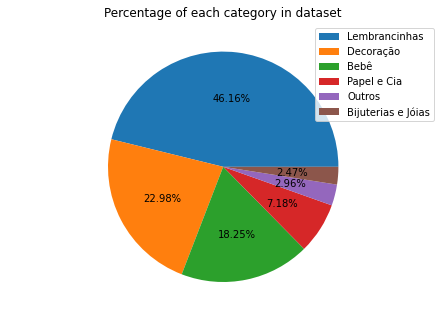

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(dataset['category'].value_counts()/dataset.shape[0],autopct='%1.2f%%')
ax.set_title('Percentage of each category in dataset')
plt.legend(labels=dataset['category'].value_counts().index, loc='best')
plt.show()

The dataset is composed of 6 categories. Most part of the entries (~46%) relies on the category "Lembrancinhas", whereas ~23% and ~18% belong to "Decoracao" and "Bebe", respectively. The other 3 categories are minor components of the dataset and together they represent around 13% of registered products.

Is the number of products in each category related to the number of sellers?

In [21]:
dataset.groupby('category')['seller_id'].nunique().sort_values(ascending=False)

category
Lembrancinhas         3178
Decoração             2762
Bebê                  2034
Papel e Cia            957
Outros                 515
Bijuterias e Jóias     363
Name: seller_id, dtype: int64

Text(0.5, 1.0, 'Number of products in each category')

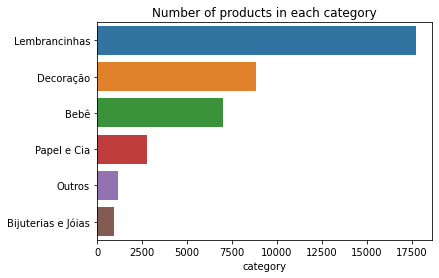

In [22]:
sns.barplot(x=dataset['category'].value_counts(),
            y=dataset['category'].value_counts().index).set_title('Number of products in each category')

Text(0.5, 1.0, 'Number of sellers in each category')

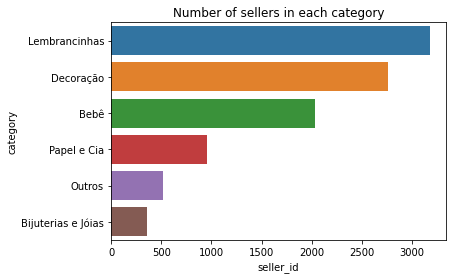

In [23]:
sns.barplot(x=dataset.groupby('category')['seller_id'].nunique().sort_values(ascending=False),
            y=dataset.groupby('category')['seller_id'].nunique().sort_values(ascending=False).index).set_title('Number of sellers in each category')

Apparently, the number of products can be related to the number of sellers in each category, but further analysis is still necessary to better understand this behavior and confirm this correlation.

How is the price distributed among the dataset?

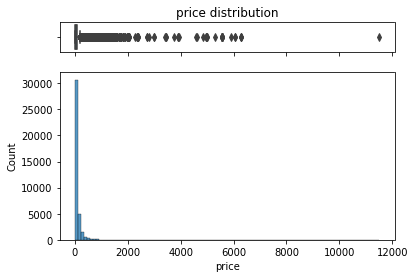

In [24]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)})
 
sns.boxplot(x=dataset['price'], ax=ax_box).set_title('price distribution')
sns.histplot(x=dataset['price'], ax=ax_hist, bins=100)
 
ax_box.set(xlabel='')
plt.show()

The wide range of price distribution makes it harder to get some informations from the chart.

Let's use log scale.

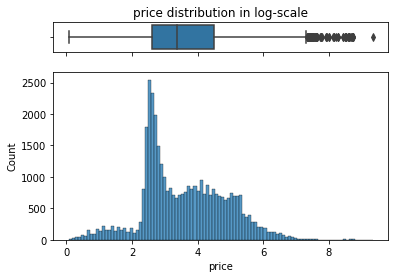

In [25]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)})
 
sns.boxplot(x=np.log1p(dataset['price']), ax=ax_box).set_title('price distribution in log-scale')
sns.histplot(x=np.log1p(dataset['price']), ax=ax_hist, bins=100)
 
ax_box.set(xlabel='')
plt.show()

Apparently, there is an outlier in the price that reaches up to 12000 BRL, whereas the average is around 90 BRL. Let's check this item.

In [26]:
dataset['price'].describe()

count    38447.000000
mean        84.122273
std        211.952413
min          0.070000
25%         12.760000
50%         28.529999
75%         90.000000
max      11509.380000
Name: price, dtype: float64

In [27]:
dataset.query('price == 11509.38')

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,category
15533,6003202,1308482,bebe reborn silicone solido,1,5,Boneca bebê de silicone sólido ecoflex Coral,rutimara aparecida pereira,2018-11-21 23:38:58,11509.38,8.0,0,5,1597,0.0,Bebê


Let's also check the item with the lowest price.

In [28]:
dataset.query('price == 0.070000')

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,category
34759,7466364,9519886,tags para roupas,3,22,1.000 Tags Personalizadas Etiquetas para Roupa...,etiquetas pieces baby working unica paulista,2019-05-09 12:52:39,0.07,9.0,0,1008,9350,8.0,Papel e Cia


The items with the lowest and the highest price are from different categories.

How is the price distribution among categories?

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Bebê'),
  Text(1, 0, 'Bijuterias e Jóias'),
  Text(2, 0, 'Decoração'),
  Text(3, 0, 'Lembrancinhas'),
  Text(4, 0, 'Outros'),
  Text(5, 0, 'Papel e Cia')])

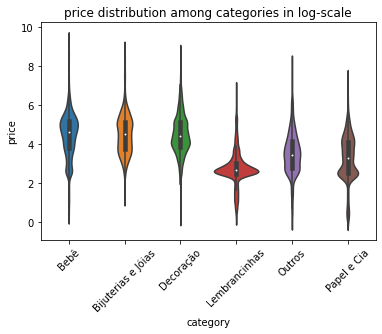

In [29]:
sns.violinplot(x=dataset['category'].sort_values(ascending=True),
                    y=np.log1p(dataset['price']), height=3.8).set_title('price distribution among categories in log-scale')
plt.xticks(rotation=45)

The categories "Bebe", "Bijuterias e Joias", and "Decoracao" has an average price above the other categories.

Can we compare the prices with the "express delivery" status?

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Bebê'),
  Text(1, 0, 'Bijuterias e Jóias'),
  Text(2, 0, 'Decoração'),
  Text(3, 0, 'Lembrancinhas'),
  Text(4, 0, 'Outros'),
  Text(5, 0, 'Papel e Cia')])

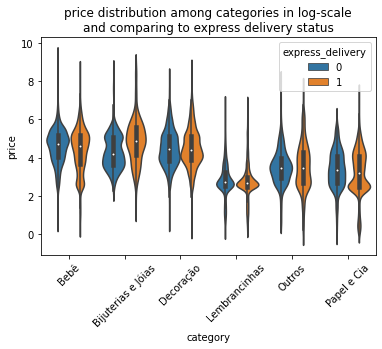

In [30]:
sns.violinplot(x=dataset['category'].sort_values(ascending=True),
                    y=np.log1p(dataset['price']), hue=dataset['express_delivery'], height=3.8).set_title('price distribution among categories in log-scale\nand comparing to express delivery status')
plt.xticks(rotation=45)

Apparently, the delivery status is not related to the price of items in most categories. However, we can notice a slight increase in the prices of items that are ready to be delivered in the "Bijuterias e Joias" category (i.e., 1 in the "express delivery" status).

Items with more views are ordered more frequently? Is it related?

- First, let's check the disctribution of these values in the dataset

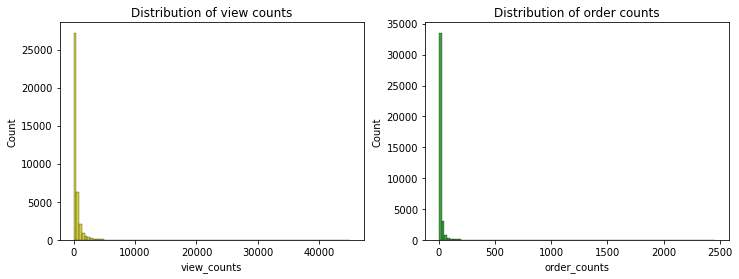

In [31]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.histplot(dataset['view_counts'], color='y', bins=100, ax=axs[0])
sns.histplot(dataset['order_counts'], color='g', bins=100, ax=axs[1])
axs[0].set_title('Distribution of view counts')
axs[1].set_title('Distribution of order counts')
plt.show()

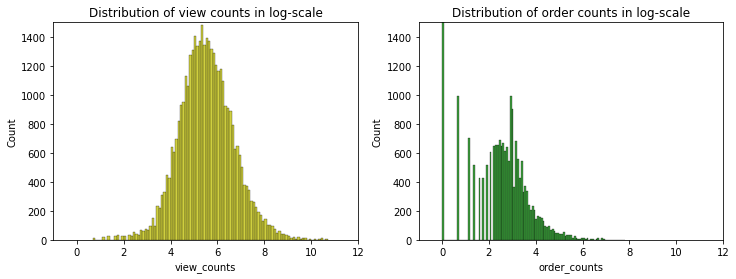

In [32]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.histplot(np.log1p(dataset['view_counts']), color='y', bins=100, ax=axs[0])
sns.histplot(np.log1p(dataset['order_counts']), color='g', bins=100, ax=axs[1])
axs[0].set_title('Distribution of view counts in log-scale')
axs[0].set_ylim([0,1500])
axs[0].set_xlim([-1,12])
axs[1].set_title('Distribution of order counts in log-scale')
axs[1].set_ylim([0,1500])
axs[1].set_xlim([-1,12])
plt.show()

Based on distributions we can't conclude anything. The number of views and orders are not related.

Let's make a correlation plot to confirm.

<AxesSubplot:xlabel='view_counts', ylabel='order_counts'>

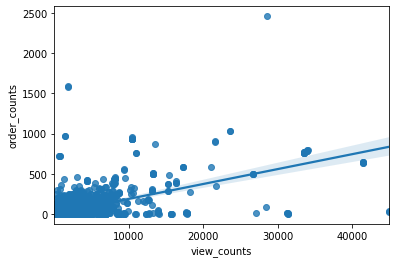

In [33]:
sns.regplot(x='view_counts', y='order_counts', data=dataset)

Based on the correlation plot with linear regression, we can see that we have a weak correlation between the number of views and ordering. In this sense, the number of sales may be independent of the number of views of a specific product.

What about the "object" columns "query" and "concatenated tags", Let's check them.

- Here we can use the "describe" function to acquire a few knowledge about these columns.

In [34]:
dataset['query'].value_counts()

bolsa maternidade                              153
dia dos pais                                   148
lembrancinha dia dos pais                      127
porta maternidade                              126
batizado                                       125
                                              ... 
onde comprar papel para envelopar geladeira      1
embalagem para palha italiana                    1
frases para faixa formatura                      1
caneca aluminio personalizada                    1
frases de formatura engracadas                   1
Name: query, Length: 6395, dtype: int64

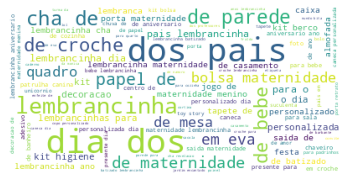

In [35]:
from wordcloud import WordCloud
text = ""
for i in dataset['query']:
    for w in i.split():
        text += w+" "
wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(background_color='white',max_words=len(text),max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Considering the world cloud, we can find the most used words as queries by the users of the platform. Such as "Lembracinha", "pais", "parede", "maternidade", "bebe", "bolsa", etc.

In [36]:
dataset['concatenated_tags'].value_counts()

dia pais                                                                                                   811
lembrancinhas                                                                                              194
batizado                                                                                                   116
tapetes                                                                                                     88
decoracao                                                                                                   71
                                                                                                          ... 
confeccao etiquetas bolsa acessorios bolsa luz vest bolsa etiquetas tecidos plaquinha dourada etiquetas      1
luminarias mdf                                                                                               1
encontro familia produtos personalizados                                                                     1
m

Text(0, 0.5, 'Number of views')

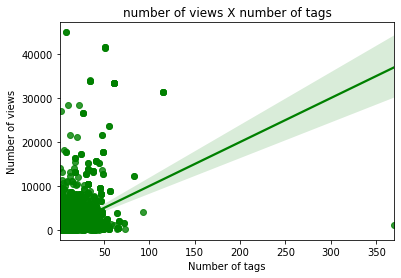

In [37]:
ct = []
view = []
for i in dataset.index:
    ct.append(len(dataset['concatenated_tags'][i].split()))
    view.append(dataset['view_counts'][i])

sns.regplot(x=ct, y=view, color = "g").set_title('number of views X number of tags')
plt.xlabel('Number of tags')
plt.ylabel('Number of views')

We can notice that the number of tags may increase the number of views of a product. In this sense, the right usage of tags is useful for sellers cause it can help buyers to find the items they are looking for.

Let's also check the 'weight' column get more knowledge about this measure in the dataset.

- First, let's check its distribution.

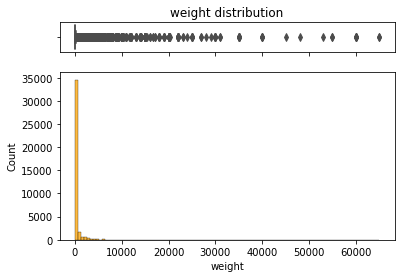

In [38]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)})
 
sns.boxplot(x=dataset['weight'], ax=ax_box, color='orange').set_title('weight distribution')
sns.histplot(x=dataset['weight'], ax=ax_hist, bins=100, color='orange')
 
ax_box.set(xlabel='')
plt.show()

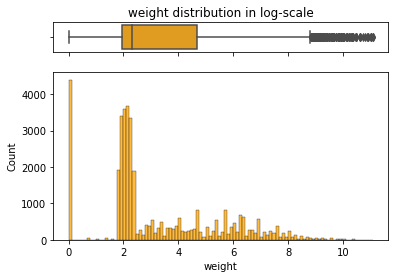

In [39]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)})
 
sns.boxplot(x=np.log1p(dataset['weight']), ax=ax_box, color='orange').set_title('weight distribution in log-scale')
sns.histplot(x=np.log1p(dataset['weight']), ax=ax_hist, bins=100, color='orange')
 
ax_box.set(xlabel='')
plt.show()

Apparently, we have several items with a weight equal to "0.0".
Let's check it with more detail and try to detect if these items belong to only one category or are spread among more than one category.

In [40]:
dataset.groupby('category')['weight'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Bebê,7015.0,394.424804,1425.323738,0.0,6.0,9.0,209.0,55007.0
Bijuterias e Jóias,951.0,61.232387,366.584620,0.0,6.0,9.0,19.0,8006.0
Decoração,8836.0,989.146446,3091.792320,0.0,7.0,156.0,712.0,65009.0
Lembrancinhas,17746.0,63.299560,277.027696,0.0,6.0,9.0,29.0,11006.0
Outros,1137.0,765.503078,4296.793777,0.0,7.0,10.0,175.0,60009.0
Papel e Cia,2762.0,126.434830,538.097324,0.0,6.0,8.0,30.0,15007.0


All cetagories present items with weight equal to "0.0".
Let's check how many items in each category present this weight. May it be related with the total number of items in each category? (i.e., check if the categories with more items will also have more items with weight equal to "0.0")

In [41]:
WZ = dataset.loc[dataset['weight'] == 0.0]
WZ.groupby('category')['weight'].value_counts()

category            weight
Bebê                0.0        862
Bijuterias e Jóias  0.0        113
Decoração           0.0        766
Lembrancinhas       0.0       2213
Outros              0.0        101
Papel e Cia         0.0        343
Name: weight, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Decoração'),
  Text(1, 0, 'Papel e Cia'),
  Text(2, 0, 'Outros'),
  Text(3, 0, 'Bebê'),
  Text(4, 0, 'Lembrancinhas'),
  Text(5, 0, 'Bijuterias e Jóias')])

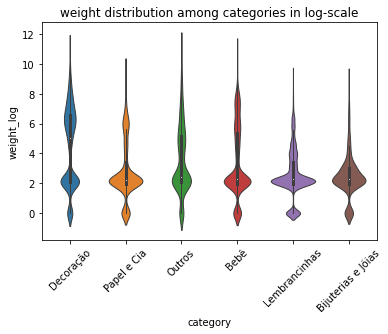

In [42]:
dataset['weight_log'] = np.log1p(dataset['weight'])
sns.violinplot(data=dataset, x='category', y='weight_log',
               linewidth=1).set_title('weight distribution among categories in log-scale')
plt.xticks(rotation=45)

In [43]:
for i in set(dataset['category']):
    T = dataset['category'].value_counts()[i]
    Z = dataset.loc[dataset['weight'] == 0.0]['category'].value_counts()[i]
    print('The category \'{}\' has a total of {} items, of which {} has a weight of Zero (it represents {}% in the category)\n--\n'.format(i, T, Z, (Z*100)/T))

The category 'Papel e Cia' has a total of 2762 items, of which 343 has a weight of Zero (it represents 12.418537291817524% in the category)
--

The category 'Lembrancinhas' has a total of 17746 items, of which 2213 has a weight of Zero (it represents 12.470415868364702% in the category)
--

The category 'Decoração' has a total of 8836 items, of which 766 has a weight of Zero (it represents 8.669081032141241% in the category)
--

The category 'Bebê' has a total of 7015 items, of which 862 has a weight of Zero (it represents 12.287954383464006% in the category)
--

The category 'Outros' has a total of 1137 items, of which 101 has a weight of Zero (it represents 8.883025505716798% in the category)
--

The category 'Bijuterias e Jóias' has a total of 951 items, of which 113 has a weight of Zero (it represents 11.882229232386962% in the category)
--



Apparently, the number of items registered with a weight equal to Zero may be related to the total number of items in the category and it represents around 10% in each category.

### Covariance and correlation analysis

Just as the relationship between variables is graphically representable, it is also measurable by a statistical estimate.

Here we will perform covariance analysis, which helps to determine whether both variables have a coincident behavior with respect to their mean. The variance can be interpreted as follow:
 - positive value means that both variables present similar behavior.
 - negative value means that both variables present an opposite behavior.
The sign of the covariance, therefore, shows the tendency in the linear relationship between the variables. However, the magnitude of the covariance is not easy to interpret because it is not normalized and hence depends on the magnitudes of the variables.

We will also apply a correlation analysis, which is the covariance estimation after having standardized the variables. We will apply the famous Pearson's correlation and the Spearman's correlation. The Pearson's correlation is the linear correlation between two sets of data, whereas Spearman's correlation is the non-linear correlation between variables.

Basically, we can interpret the results obtained by both correlations as follows:
 - result is positive: there is a positive relationship between variables, which means that when one variable increases the other one also increases.
 - result is negative: there is a negative relationship between variables, which means that when one variable increases the other one decreases.
 - result is equal to zero: there is no relationship between variables.


In [44]:
dataset.cov()

,product_id,seller_id,search_page,position,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,weight_log
product_id,2.337912e+13,-1.346424e+11,1703.039229,13946.230587,9.349231e+06,1.016342e+07,-16901.080407,-1.366938e+06,7.338169e+07,1.181393e+06,46514.947539
seller_id,-1.346424e+11,8.686622e+12,-46557.100046,-489633.751921,5.629073e+06,6.498668e+07,-10047.917051,1.400203e+06,6.002252e+07,8.461543e+05,138552.455515
search_page,1.703039e+03,-4.655710e+04,0.960701,0.615884,-6.747854e-01,-3.807269e+01,0.011611,9.453624e-01,-3.364631e+01,-1.420669e-01,-0.051452
position,1.394623e+04,-4.896338e+05,0.615884,134.312910,-7.325015e+00,-2.178823e+02,0.001471,3.125181e+00,-1.041147e+03,-1.998087e+01,-0.168552
price,9.349231e+06,5.629073e+06,-0.674785,-7.325015,4.492383e+04,8.266248e+04,-3.783860,-7.488929e+02,-5.355445e+02,-1.406218e+02,57.749571
weight,1.016342e+07,6.498668e+07,-38.072687,-217.882345,8.266248e+04,3.315230e+06,-38.572476,-2.994235e+03,3.333751e+04,5.038974e+02,1770.965310
express_delivery,-1.690108e+04,-1.004792e+04,0.011611,0.001471,-3.783860e+00,-3.857248e+01,0.171293,1.549471e+00,-1.229727e+01,-9.373740e-01,-0.116250
minimum_quantity,-1.366938e+06,1.400203e+06,0.945362,3.125181,-7.488929e+02,-2.994235e+03,1.549471,1.918458e+03,1.921124e+03,6.858025e+00,-7.967408
view_counts,7.338169e+07,6.002252e+07,-33.646305,-1041.147272,-5.355445e+02,3.333751e+04,-12.297268,1.921124e+03,2.009276e+06,3.722693e+04,88.737658
order_counts,1.181393e+06,8.461543e+05,-0.142067,-19.980874,-1.406218e+02,5.038974e+02,-0.937374,6.858025e+00,3.722693e+04,1.913470e+03,6.184449


In [45]:
dataset.corr()

,product_id,seller_id,search_page,position,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,weight_log
product_id,1.000000,-0.009448,0.000359,0.000249,0.009123,0.001154,-0.008446,-0.006454,0.010707,0.005586,0.004415
seller_id,-0.009448,1.000000,-0.016116,-0.014335,0.009011,0.012110,-0.008237,0.010846,0.014367,0.006563,0.021573
search_page,0.000359,-0.016116,1.000000,0.054218,-0.003248,-0.021334,0.028622,0.022021,-0.024217,-0.003314,-0.024090
position,0.000249,-0.014335,0.054218,1.000000,-0.002982,-0.010325,0.000307,0.006157,-0.063377,-0.039413,-0.006674
price,0.009123,0.009011,-0.003248,-0.002982,1.000000,0.214197,-0.043135,-0.080669,-0.001783,-0.015167,0.125035
weight,0.001154,0.012110,-0.021334,-0.010325,0.214197,1.000000,-0.051186,-0.037545,0.012917,0.006327,0.446349
express_delivery,-0.008446,-0.008237,0.028622,0.000307,-0.043135,-0.051186,1.000000,0.085475,-0.020961,-0.051776,-0.128897
minimum_quantity,-0.006454,0.010846,0.022021,0.006157,-0.080669,-0.037545,0.085475,1.000000,0.030943,0.003579,-0.083476
view_counts,0.010707,0.014367,-0.024217,-0.063377,-0.001783,0.012917,-0.020961,0.030943,1.000000,0.600381,0.028728
order_counts,0.005586,0.006563,-0.003314,-0.039413,-0.015167,0.006327,-0.051776,0.003579,0.600381,1.000000,0.064880


Text(0.5, 1.0, "Pearson's correlation")

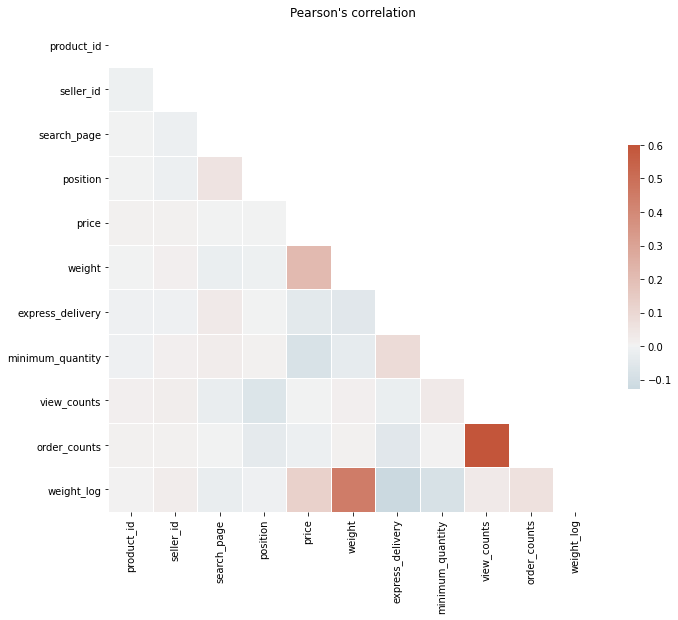

In [46]:
corr = dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title('Pearson\'s correlation')

In [47]:
dataset.corr(method='spearman')

,product_id,seller_id,search_page,position,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,weight_log
product_id,1.000000,-0.009322,-0.000975,0.000245,-0.002138,0.005354,-0.008453,0.001122,-0.003721,-0.002213,0.005354
seller_id,-0.009322,1.000000,-0.018639,-0.014065,0.021062,0.022995,-0.008069,-0.008310,0.006741,0.004542,0.022995
search_page,-0.000975,-0.018639,1.000000,0.059779,-0.063503,-0.020124,0.032349,0.082718,-0.033372,0.011146,-0.020124
position,0.000245,-0.014065,0.059779,1.000000,-0.010160,-0.006874,0.000990,0.020624,-0.138455,-0.036591,-0.006874
price,-0.002138,0.021062,-0.063503,-0.010160,1.000000,0.220785,-0.167712,-0.642112,-0.034290,0.101079,0.220785
weight,0.005354,0.022995,-0.020124,-0.006874,0.220785,1.000000,-0.111066,-0.181091,-0.003405,0.193936,1.000000
express_delivery,-0.008453,-0.008069,0.032349,0.000990,-0.167712,-0.111066,1.000000,0.280983,0.031455,-0.092608,-0.111066
minimum_quantity,0.001122,-0.008310,0.082718,0.020624,-0.642112,-0.181091,0.280983,1.000000,0.095712,-0.106142,-0.181091
view_counts,-0.003721,0.006741,-0.033372,-0.138455,-0.034290,-0.003405,0.031455,0.095712,1.000000,0.313339,-0.003405
order_counts,-0.002213,0.004542,0.011146,-0.036591,0.101079,0.193936,-0.092608,-0.106142,0.313339,1.000000,0.193936


Text(0.5, 1.0, "Spearman's correlation")

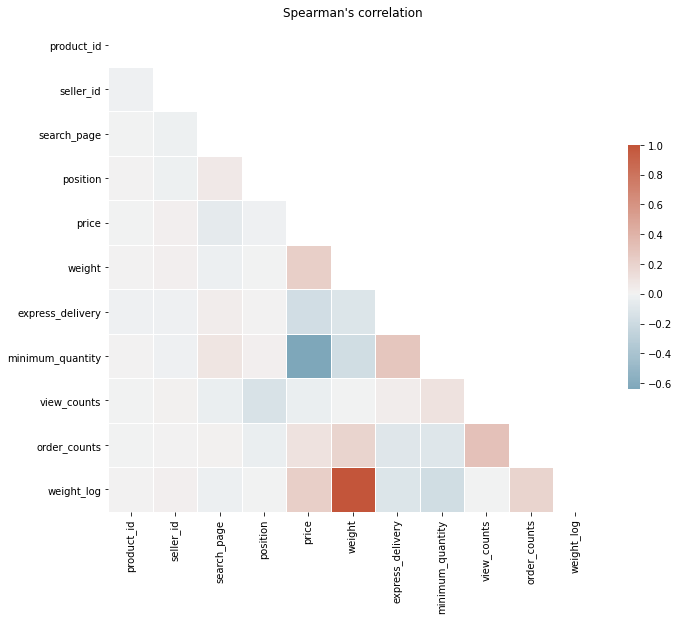

In [48]:
corr = dataset.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title('Spearman\'s correlation')

In these analysis, we noticed some positive (e.g. 'view_counts' and 'order_counts', 'price' and 'weight', etc) and negative (e.g., 'minimum_quantity' and 'price') relationships among variables. However, we may be able to better understand these relationhips if we apply some modifications in data distributions.

We will work on it in the next section.

### Preparing dataset for downstream analysis

In this section, we will perform the famous 'feature engineering' step, which is based on preparing the dataset to improve the performance of downstream analysis, such as the design of predictive models using machine learning or other approaches.

PS: despite we already performed some cleaning steps earlier, we still need to perform some tasks like Binning, Log Transform, Scaling, and one-hot encoding when needed to help improve the performance of the machine learning models that we will design with the dataset.

In [49]:
#adding a log scale of price, order_counts and views_counts
dataset['price_log'] = np.log1p(dataset['price'])
dataset['oc_log'] = np.log1p(dataset['order_counts'])
dataset['vc_log'] = np.log1p(dataset['view_counts'])

In [50]:
#capping the outlier rows with percentiles
upper_lim = dataset['minimum_quantity'].quantile(.99)
lower_lim = dataset['minimum_quantity'].quantile(.01)
dataset.loc[(dataset['minimum_quantity'] > upper_lim), 'minimum_quantity'] = upper_lim

In [51]:
#binning
dataset['price_bin'] = pd.cut(dataset['price'], bins=[0,50,150,300,13000], labels=['Low', 'Mid', 'High', 'VeryHigh']).head()

In [52]:
#one-hot encoding
dataset.loc[dataset['weight'] <= 50.0, 'Wto50'] = 1
dataset.loc[(dataset['weight'] > 50.0) & (dataset['weight'] <= 100.0), 'W50to100'] = 1
dataset.loc[(dataset['weight'] > 100.0) & (dataset['weight'] <= 250.0), 'W100to250g'] = 1
dataset.loc[dataset['weight'] > 250.0, 'Wabove250'] = 1

In [53]:
dataset['Wto50'].fillna(0,inplace=True)
dataset['W50to100'].fillna(0,inplace=True)
dataset['W100to250g'].fillna(0,inplace=True)
dataset['Wabove250'].fillna(0,inplace=True)

In [54]:
dataset.head()

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,...,category,weight_log,price_log,oc_log,vc_log,price_bin,Wto50,W50to100,W100to250g,Wabove250
0,11394449,8324141,espirito santo,2,6,Mandala Espírito Santo,mandala mdf,2015-11-14 19:42:12,171.890000,1200.0,...,Decoração,7.090910,5.152656,0.000000,5.501258,High,0.0,0.0,0.0,1.0
1,15534262,6939286,cartao de visita,2,0,Cartão de Visita,cartao visita panfletos tag adesivos copos lon...,2018-04-04 20:55:07,77.670000,8.0,...,Papel e Cia,2.197225,4.365262,0.000000,4.828314,Mid,1.0,0.0,0.0,0.0
2,16153119,9835835,expositor de esmaltes,1,38,Organizador expositor p/ 70 esmaltes,expositor,2018-10-13 20:57:07,73.920006,2709.0,...,Outros,7.904704,4.316421,0.000000,4.094345,Mid,0.0,0.0,0.0,1.0
3,15877252,8071206,medidas lencol para berco americano,1,6,Jogo de Lençol Berço Estampado,t jogo lencol menino lencol berco,2017-02-27 13:26:03,118.770004,0.0,...,Bebê,0.000000,4.785573,0.693147,5.198497,Mid,1.0,0.0,0.0,0.0
4,15917108,7200773,adesivo box banheiro,3,38,ADESIVO BOX DE BANHEIRO,adesivo box banheiro,2017-05-09 13:18:38,191.810000,507.0,...,Decoração,6.230481,5.261705,0.000000,3.555348,High,0.0,0.0,0.0,1.0


In [55]:
dataset.corr()

,product_id,seller_id,search_page,position,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,weight_log,price_log,oc_log,vc_log,Wto50,W50to100,W100to250g,Wabove250
product_id,1.000000,-0.009448,0.000359,0.000249,0.009123,0.001154,-0.008446,-0.002272,0.010707,0.005586,0.004415,0.000369,-0.000990,-0.000415,-0.002173,-0.002962,0.001278,0.003401
seller_id,-0.009448,1.000000,-0.016116,-0.014335,0.009011,0.012110,-0.008237,0.003537,0.014367,0.006563,0.021573,0.021006,0.004412,0.010332,-0.013406,-0.003028,0.013660,0.008894
search_page,0.000359,-0.016116,1.000000,0.054218,-0.003248,-0.021334,0.028622,0.056763,-0.024217,-0.003314,-0.024090,-0.049356,0.011488,-0.037069,0.029351,0.006363,-0.024355,-0.022766
position,0.000249,-0.014335,0.054218,1.000000,-0.002982,-0.010325,0.000307,0.010667,-0.063377,-0.039413,-0.006674,-0.007708,-0.040498,-0.136334,0.011391,-0.001170,0.000416,-0.012925
price,0.009123,0.009011,-0.003248,-0.002982,1.000000,0.214197,-0.043135,-0.170475,-0.001783,-0.015167,0.125035,0.567113,-0.013858,0.023408,-0.076446,-0.059925,-0.040511,0.147953
weight,0.001154,0.012110,-0.021334,-0.010325,0.214197,1.000000,-0.051186,-0.088156,0.012917,0.006327,0.446349,0.261988,0.007469,0.017127,-0.289403,-0.037115,-0.029607,0.377483
express_delivery,-0.008446,-0.008237,0.028622,0.000307,-0.043135,-0.051186,1.000000,0.176660,-0.020961,-0.051776,-0.128897,-0.151200,-0.092646,0.024070,0.129692,0.004994,-0.059782,-0.117364
minimum_quantity,-0.002272,0.003537,0.056763,0.010667,-0.170475,-0.088156,0.176660,1.000000,0.065950,0.021394,-0.181286,-0.484586,-0.078008,0.118973,0.196941,0.074391,-0.068890,-0.229073
view_counts,0.010707,0.014367,-0.024217,-0.063377,-0.001783,0.012917,-0.020961,0.065950,1.000000,0.600381,0.028728,-0.008595,0.265883,0.557461,-0.019140,0.041903,-0.024011,0.013892
order_counts,0.005586,0.006563,-0.003314,-0.039413,-0.015167,0.006327,-0.051776,0.021394,0.600381,1.000000,0.064880,0.002360,0.543362,0.356903,-0.053041,0.037883,-0.005795,0.044480


Text(0.5, 1.0, "Pearson's correlation")

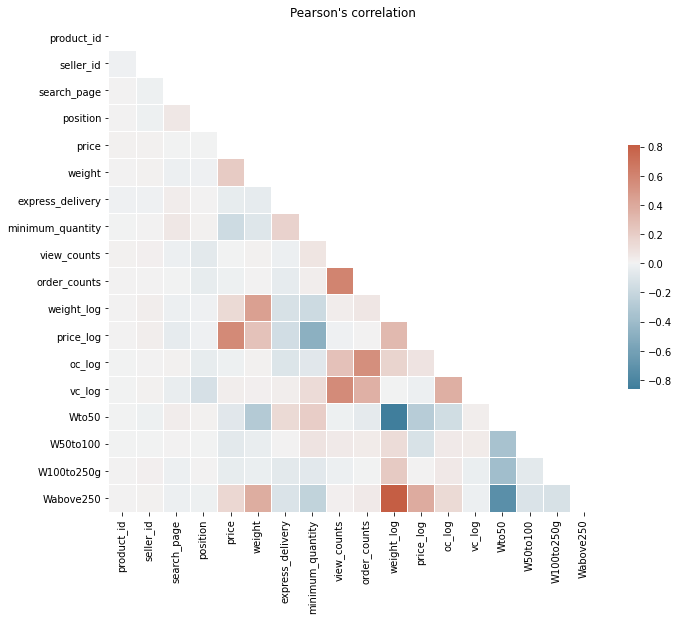

In [56]:
corr = dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title('Pearson\'s correlation')

Text(0.5, 1.0, "Spearman's correlation")

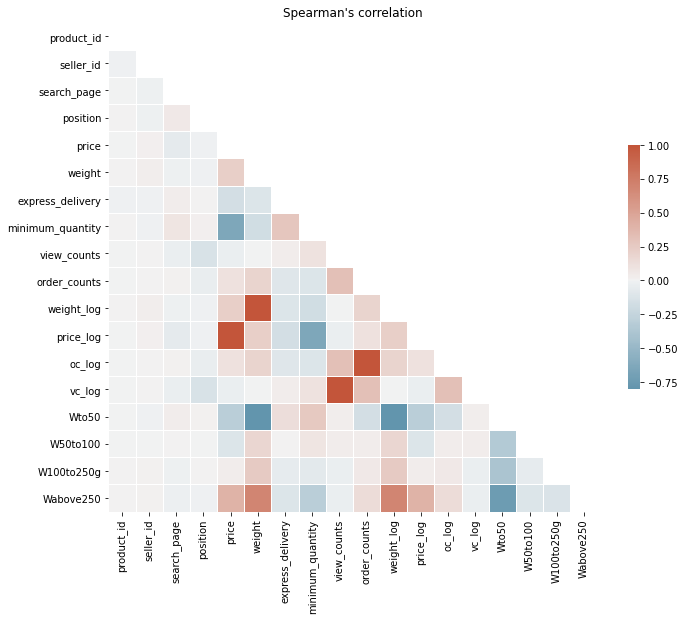

In [57]:
corr = dataset.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title('Spearman\'s correlation')

With the transformations we applied in the data, we have a better picture of the positive and negative relationships. It may help us on the next step, which is related to the design of machine learning models.

## Part 2 - Products classification system

In this section, we will work to design a classification model that is able to categorize the products.

This classification system is based on a multi-class task (i.e., non-binary). Our model must be able to classify the items into 6 putative categories (i.e., "Bebê", "Bijuterias e Jóias", "Decoração", "Lembrancinhas", "Papel e Cia", and "Outros"). We should choose variables to be used as predictive features (i.e., the "X" variable) and other variables to be predicted based on the "X" variable (i.e., the "Y" variable).